# Project 4: Poisonous Mushrooms

**Solution**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented, 
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [180]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [278]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


In [364]:
df = pd.read_csv('https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data')
df.head(6)
print(Y.shape)
Y


(8124,)


array([1, 0, 0, ..., 1, 0, 1])

### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

The variance explained by the number of Principle Components:


,0
1,0.297278
2,0.399013
3,0.469646
4,0.508313
5,0.545121
10,0.672697
20,0.819678
30,0.904962
40,0.955123
50,0.983971


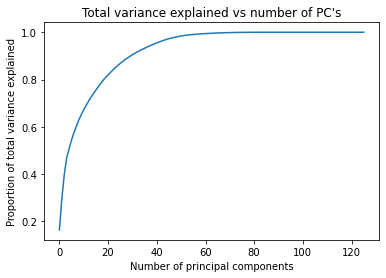

In [365]:
def P1():
    ## STUDENT START ###
    
    # Part 1
    
    dims = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    
    #Begin PCA up to 126 axis
    pca = PCA(train_data.shape[1])
    X_train_pca = pca.fit(train_data)
    explained_variances = np.cumsum(pca.explained_variance_ratio_)
    print("The variance explained by the number of Principle Components:")
    display(pd.DataFrame(explained_variances[dims],index = dims))

    plt.plot(explained_variances)
    plt.xlabel("Number of principal components")
    plt.ylabel("Proportion of total variance explained")
    plt.title("Total variance explained vs number of PC's")
        ## STUDENT END ###
        

P1()


### Question 2: PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

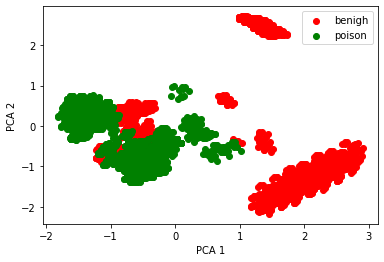

In [482]:
def Q2():   
  ### STUDENT START ###
    #Reduce to 2 dimensions
    pca = PCA(n_components = 2)
    x_pca = pca.fit_transform(train_data)
    reduced_dim_2 = pd.DataFrame(pca.transform(test_data),columns=["benign","poison"])

    #plot scatterplot
    plt.scatter(x = x_pca[:,0][train_labels == 1] , y = x_pca[:,1][train_labels == 1], c = 'r', label='benigh')
    plt.scatter(x = x_pca[:,0][train_labels == 0] , y = x_pca[:,1][train_labels == 0], c = 'g', label='poison')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    
  ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

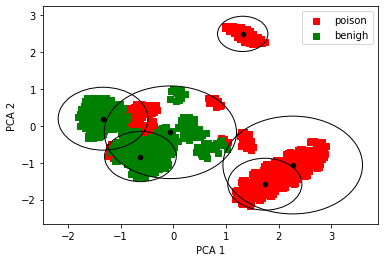

In [488]:
def Q3():   
  ### STUDENT START ###
    
    #KMeans and PCA dimension reduction
    km = KMeans(n_clusters = 6)
    pca = PCA(n_components = 2)
    x_pca = pca.fit_transform(train_data)
    
    #get results
    y_km = km.fit_predict(x_pca)
    
    #centroid and create figure
    centroids = km.cluster_centers_
    fig, ax = plt.subplots()
    
    #Plotting the results
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.scatter(x_pca[:,0][train_labels == 1] ,x_pca[:,1][train_labels == 1] , color = 'r', marker = 's', label='poison')
    plt.scatter(x_pca[:,0][train_labels == 0] ,x_pca[:,1][train_labels == 0] , color = 'g', marker = 's', label='benigh')
    plt.legend()
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k', marker = 'o')
    
    #get radius
    radi = []
    for i in range(6):
        #get radiuses
        candidates = []
        for xy in zip(x_pca[y_km == i, 0],x_pca[y_km == i, 1]) :
            radiuses = np.linalg.norm(xy - centroids[i]) 
            candidates.append(radiuses)
        radi.append(max(candidates))
    
    
    #plot circles   
    circle1 = plt.Circle(centroids[0], radi[0], color='k',fill = False)
    circle2 = plt.Circle(centroids[1], radi[1], color='k',fill = False)
    circle3 = plt.Circle(centroids[2], radi[2], color='k',fill = False)
    circle4 = plt.Circle(centroids[3], radi[3], color='k',fill = False)
    circle5 = plt.Circle(centroids[4], radi[4], color='k',fill = False)
    circle6 = plt.Circle(centroids[5], radi[5], color='k',fill = False)

    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    ax.add_patch(circle4)
    ax.add_patch(circle5)
    ax.add_patch(circle6)
    

  ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

<ipython-input-494-de4343ac6578>:35: UserWarning: Log scale: values of z <= 0 have been masked
  CS = axarr[i,j].contour(X,Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-494-de4343ac6578>:35: UserWarning: Log scale: values of z <= 0 have been masked
  CS = axarr[i,j].contour(X,Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-494-de4343ac6578>:35: UserWarning: Log scale: values of z <= 0 have been masked
  CS = axarr[i,j].contour(X,Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-494-de4343ac6578>:35: UserWarning: Log scale: values of z <= 0 have been masked
  CS = axarr[i,j].contour(X,Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-494-de4343ac6578>:35: UserWarning: Log scale: values of z <= 0 have been masked
  CS = axarr[i,j].contour(X,Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
<ipython-input-494-d

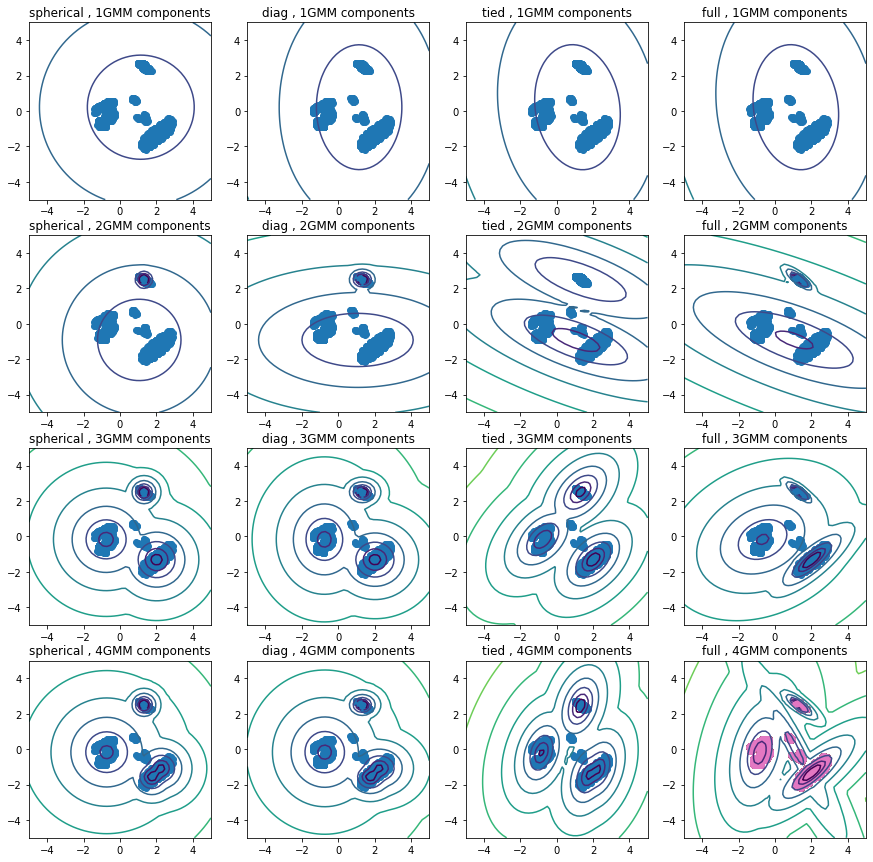

In [494]:
def Q4():
    ### STUDENT START ###
    cov_types = ['spherical', 'diag', 'tied', 'full']
    # Make 2d data
    pca = PCA(n_components = 2)
    x_pca = pca.fit_transform(train_data)
    
    #get poisonous sample
    poisonous_pca = x_pca[train_labels == 1]
    df = pd.DataFrame(poisonous_pca)
    
    #plot the data
    f, axarr = plt.subplots(4,4, figsize = (15,15))
    for i in range(4):
        for j in range(4):
            
            plt.scatter(x = poisonous_pca[:,0] , y = poisonous_pca[:,1])
        
            #Fit and train model
            GMM = GaussianMixture(n_components= i+1, covariance_type= cov_types[j], random_state=12345)
            GMM.fit(poisonous_pca)
            y_pred = GMM.predict(poisonous_pca)
            
            #Create visuals
            plt.gca()

            x = np.linspace(-5.0, 5.0)
            y = np.linspace(-5.0, 5.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -GMM.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            #plot
            CS = axarr[i,j].contour(X,Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            axarr[i,j].scatter(x = poisonous_pca[:,0] , y = poisonous_pca[:,1])
            axarr[i,j].title.set_text(str( str(cov_types[j]) + " , " + str(i + 1)+ 'GMM components'))
            
    ### STUDENT END ###

Q4()

Answer:  
How are tied and full different? Looking at the rightmost 2 columns we see that in the tied graphs, the orbit/contours stay connected (i.e, try to keep its oval shape) without allowing for distortions (maybe not allowing for possibilities of overlaps in the generative process?). In the full diagrams we see distortion of the contours signalling that the way the algorithm is trying to determine the Gaussian is more flexible, allowing for less elliptical shapes to remain elliptical if it senses there are more complex structures.

### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [481]:
def Q5():  
  ### STUDENT START ###
    ### Part 1
    
    #reduce to 2d
    pca = PCA(n_components = 2)
    x_pca = pca.fit_transform(train_data)
    x_pca_test = pca.transform(test_data)
    
    #get poison and benigh rows + fit model with 4 components and full covariance
    gmm_poison    = x_pca[train_labels == 1]
    gmm_nonpoison = x_pca[train_labels == 0]
    GMM = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=12345)
    gmm_pois = GaussianMixture(n_components=4, covariance_type = 'full', random_state=12345).fit(gmm_poison)
    gmm_no_pois = GMM.fit(gmm_nonpoison)
    
    ### Part 2 
    y_pred_poison = gmm_pois.predict(x_pca[train_labels == 1])
    y_pred_nopois = gmm_no_pois.predict(x_pca[train_labels == 0])
    
    accuracy_pois   = 0
    accuracy_benigh = 0
    
    #print(gmm_pois.score_samples(x_pca_test))
    #print(gmm_no_pois.score_samples(x_pca_test))
    
    #Couldn't figure out how not to use for loop so here we are:
    #Iterate through score_samples to see if it correctly predicts label using test data
    for i in range(len(test_labels)):
        if test_labels[i] == 1 and gmm_pois.score_samples(x_pca_test)[i] > gmm_no_pois.score_samples(x_pca_test)[i]:
            accuracy_pois += 1
        elif test_labels[i] == 0 and gmm_pois.score_samples(x_pca_test)[i] < gmm_no_pois.score_samples(x_pca_test)[i]:
            accuracy_benigh += 1
            
    size_test_pois = len(test_labels[test_labels == 1])
    size_test_beni = len(test_labels[test_labels == 0])
    
    #Print accuracies on predicting poisson, benigh, and the avg of the two
    print("accuracy of poison predictor model:",accuracy_pois/size_test_pois )
    print("accuracy of benigh predictor model:",accuracy_benigh/size_test_beni )
    print("average accuracy of entire model", ((accuracy_pois/size_test_pois) + (accuracy_benigh/size_test_beni))/2 )
  ### STUDENT END ###

Q5()

accuracy of poison predictor model: 0.9345403899721448
accuracy of benigh predictor model: 0.9778325123152709
average accuracy of entire model 0.9561864511437079


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance. 
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

The best model had an accuracy of: 0.6761565836298933 , number of pca components: 7 , number of gmm components: 2    ,and covariance type:  spherical


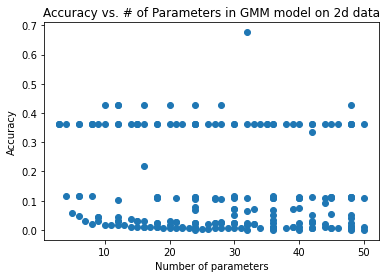

In [480]:
from matplotlib.lines import Line2D

def Q6():
  ### STUDENT START ###
    #initialize best parameters and list of parameters + accuracies
    num_parameters = []
    accuracies     = []
    best_accuracy  = 0   
    best_pca_comp  = 0
    best_gmm_comp  = 0
    best_cov_type  = ' '
    #iterate through components
    for pca_components in range(1,30):
        for gm_components in range(1,30):
            for cov_type in ['spherical', 'diag', 'tied', 'full']:
                #Count parameters
                parameters = 0
                if cov_type == 'spherical':
                    parameters = ((pca_components*gm_components) + gm_components)*2
                elif cov_type == 'diag':
                    parameters = ((pca_components*gm_components) + (pca_components * gm_components)* 2)
                elif cov_type == 'tied':
                    parameters = ((pca_components*gm_components) + (pca_components * (pca_components + 1)/ 2)* 2)
                elif cov_type == 'full':
                    parameters = ((pca_components*gm_components) + (pca_components * (pca_components + 1)/ 2 * gm_components)* 2)
            
                #if parameters exceed 50, move on
                if parameters > 50:
                    continue
                    
                else:
                    #fit models
                    pca = PCA(n_components = pca_components)
                    x_pca = pca.fit_transform(train_data)
                    x_pca_test = pca.transform(test_data)
                    
                    gmm = GaussianMixture(n_components=gm_components , covariance_type= cov_type, random_state=12345)
                    gmm.fit(x_pca)
                    y_pred = gmm.predict(x_pca_test)
                    
                    #append number of parameters and their accuracies
                    num_parameters.append(parameters)
                    accurate = 0
                    for i in range(len(y_pred)):
                        if y_pred[i] == test_labels[i]:
                            accurate += 1
                    accuracy = accurate / len(test_labels)
                    accuracies.append(accuracy)
                    # catch the best performing model
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_pca_comp = pca_components
                        best_gmm_comp = gm_components
                        best_cov_type = cov_type
                        
    #Plot 
    plt.scatter(x = num_parameters, y = accuracies)
    plt.xlabel("Number of parameters")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. # of Parameters in GMM model on 2d data")
    print("The best model had an accuracy of:",best_accuracy, ", number of pca components:",best_pca_comp,
            ", number of gmm components:",best_gmm_comp,"   ,and covariance type:",best_cov_type  )
                    
            
  ### STUDENT END ###

Q6()

In [495]:
pwd


'/Users/alejandropelcastre/Desktop/Data_Science_Projects/w207/cilin-coursework/projects'